# Nussl FFT

In [4]:
import nussl
import time
start_time = time.time()


In [12]:
input_file_path = nussl.efz_utils.download_audio_file('schoolboy_fascination_excerpt.wav')
signal1 = nussl.AudioSignal(input_file_path)
print('STFT Data: ', signal1.stft_data)

Matching file found at /Users/dominicvian/.nussl/audio/schoolboy_fascination_excerpt.wav, skipping download.
STFT Data:  None


In [13]:
stft = signal1.stft()
print(stft.shape)

(1025, 1293, 2)


In [17]:
psd = signal1.power_spectrogram_data
print(psd.shape)

(1025, 1293, 2)


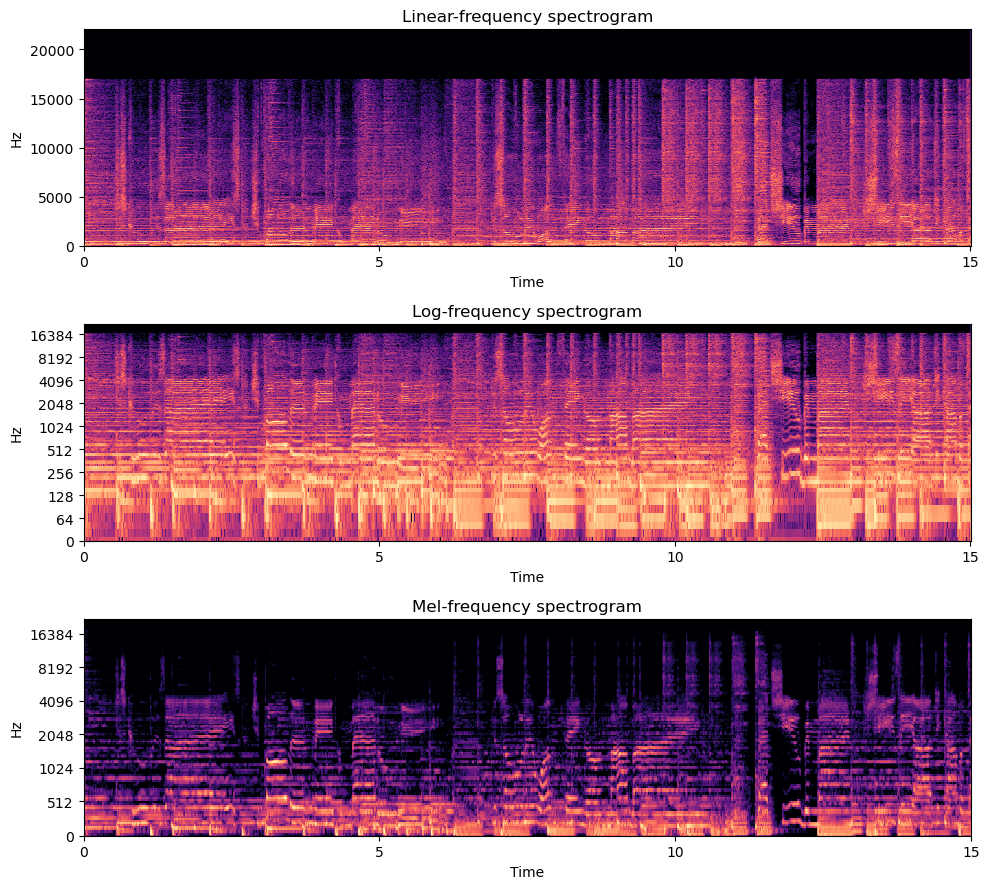

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 9))
plt.subplot(311)
plt.title('Linear-frequency spectrogram')
nussl.utils.visualize_spectrogram(signal1)

plt.subplot(312)
plt.title('Log-frequency spectrogram')
nussl.utils.visualize_spectrogram(signal1, y_axis='log')

plt.subplot(313)
plt.title('Mel-frequency spectrogram')
nussl.utils.visualize_spectrogram(signal1, y_axis='mel')

plt.tight_layout()
plt.show()

In [19]:
import numpy as np

lp_stft = signal1.stft_data.copy()
lp_cutoff = 1000
frequency_vector = signal1.freq_vector
idx = (np.abs(frequency_vector - lp_cutoff)).argmin()
lp_stft[idx:, :, :] = 0.0j

In [22]:
signal1_lp = signal1.make_copy_with_stft_data(lp_stft)
print('Audio Data: ', signal1_lp.audio_data)

Audio Data:  None


In [24]:
signal1_lp.istft()
signal1_lp.embed_audio()
print(signal1_lp)

ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with clang version 4.0.1 (tags/RELEASE_401/final)
  configuration: --prefix=/opt/miniconda3/envs/tf --cc=x86_64-apple-darwin13.4.0-clang --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.100 / 56. 31.100
  libavcodec     58. 54.100 / 58. 54.100
  libavformat    58. 29.100 / 58. 29.100
  libavdevice    58.  8.100 / 58.  8.100
  libavfilter     7. 57.100 /  7. 57.100
  libavresample   4.  0.  0 /  4.  0.  0
  libswscale      5.  5.100 /  5.  5.100
  libswresample   3.  5.100 /  3.  5.100
  libpostproc    55.  5.100 / 55.  5.100
Guessed Channel Layout for Input Strea

AudioSignal (unlabeled): 15.000 sec @ /Users/dominicvian/.nussl/audio/schoolboy_fascination_excerpt.wav, 44100 Hz, 2 ch.


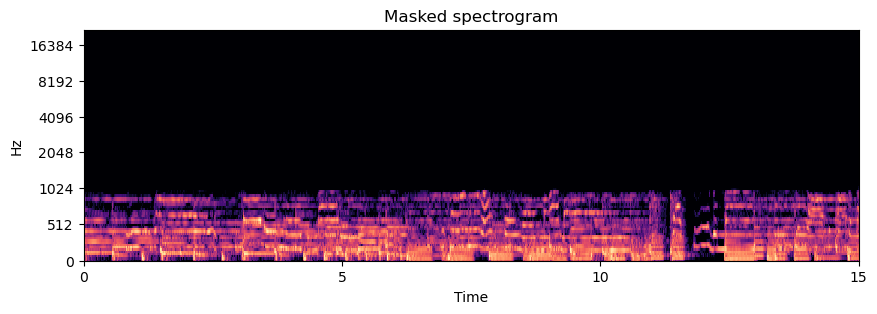

In [25]:
plt.figure(figsize=(10, 3))
plt.title('Masked spectrogram')
nussl.utils.visualize_spectrogram(signal1_lp, y_axis='mel')
plt.show()

# Audio source seperation 

In [1]:
import nussl
import time 
import numpy as np
import matplotlib.pyplot as plt
import copy

start_time = time.time()

musdb = nussl.datasets.MUSDB18(download=True)

item = musdb[40]
mix = item['mix']
sources = item['sources']



Done!


In [2]:
mix.embed_audio()
print (mix)

ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with clang version 4.0.1 (tags/RELEASE_401/final)
  configuration: --prefix=/opt/miniconda3/envs/tf --cc=x86_64-apple-darwin13.4.0-clang --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.100 / 56. 31.100
  libavcodec     58. 54.100 / 58. 54.100
  libavformat    58. 29.100 / 58. 29.100
  libavdevice    58.  8.100 / 58.  8.100
  libavfilter     7. 57.100 /  7. 57.100
  libavresample   4.  0.  0 /  4.  0.  0
  libswscale      5.  5.100 /  5.  5.100
  libswresample   3.  5.100 /  3.  5.100
  libpostproc    55.  5.100 / 55.  5.100
Guessed Channel Layout for Input Strea

AudioSignal (unlabeled): 6.803 sec @ James May - Dont Let Go, 44100 Hz, 2 ch.


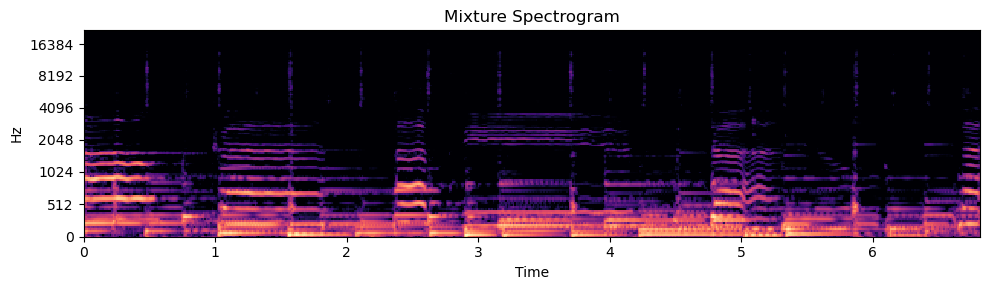

In [3]:
plt.figure(figsize=(10, 3))
plt.title('Mixture Spectrogram')
nussl.utils.visualize_spectrogram(mix, y_axis='mel')
plt.tight_layout()
plt.show()

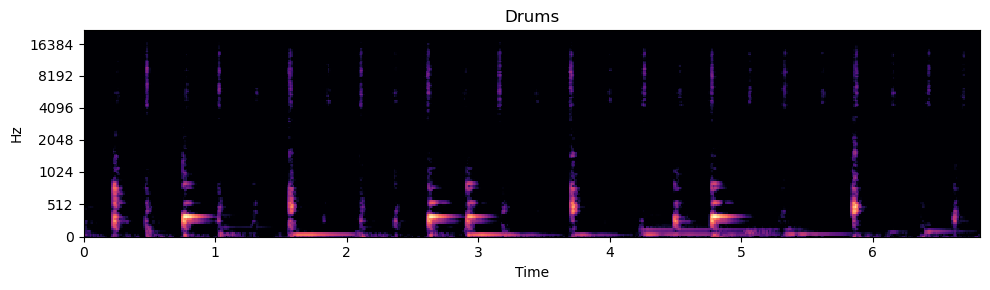

In [4]:
plt.figure(figsize=(10, 3))
plt.title('Drums')
nussl.utils.visualize_spectrogram(sources['drums'], y_axis='mel')
plt.tight_layout()
plt.show()

In [6]:
mask_data = np.abs(sources['drums'].stft()) / np.abs(mix.stft())

In [7]:
mask_data = (
    np.abs(sources['drums'].stft()) / 
    np.maximum(np.abs(mix.stft()), 
    np.abs(sources['drums'].stft())) 
    + nussl.constants.EPSILON
)

ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with clang version 4.0.1 (tags/RELEASE_401/final)
  configuration: --prefix=/opt/miniconda3/envs/tf --cc=x86_64-apple-darwin13.4.0-clang --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.100 / 56. 31.100
  libavcodec     58. 54.100 / 58. 54.100
  libavformat    58. 29.100 / 58. 29.100
  libavdevice    58.  8.100 / 58.  8.100
  libavfilter     7. 57.100 /  7. 57.100
  libavresample   4.  0.  0 /  4.  0.  0
  libswscale      5.  5.100 /  5.  5.100
  libswresample   3.  5.100 /  3.  5.100
  libpostproc    55.  5.100 / 55.  5.100
Guessed Channel Layout for Input Strea

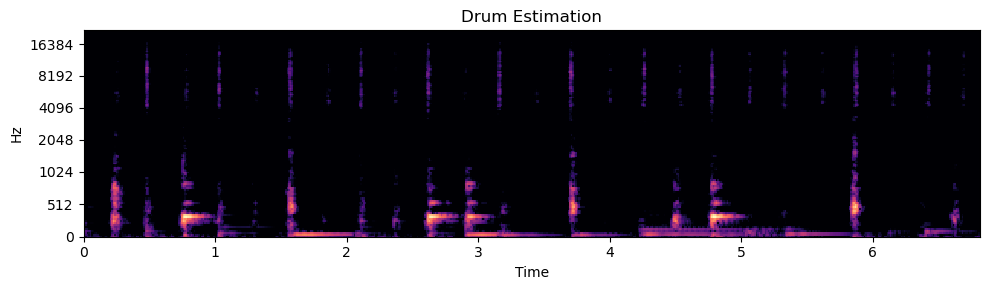

In [8]:
magnitude, phase = np.abs(mix.stft_data), np.angle(mix.stft_data)
masked_abs = magnitude * mask_data
masked_stft = masked_abs * np.exp(1j * phase)


drum_est = mix.make_copy_with_stft_data(masked_stft)
drum_est.istft()
drum_est.embed_audio()


plt.figure(figsize=(10, 3))
plt.title('Drum Estimation')
nussl.utils.visualize_spectrogram(drum_est, y_axis='mel')
plt.tight_layout()
plt.show()

# Built in functionality

## soft mask

In [9]:
soft_mask = nussl.core.masks.SoftMask(mask_data)
soft_mask.mask.shape

(1025, 587, 2)

ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with clang version 4.0.1 (tags/RELEASE_401/final)
  configuration: --prefix=/opt/miniconda3/envs/tf --cc=x86_64-apple-darwin13.4.0-clang --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.100 / 56. 31.100
  libavcodec     58. 54.100 / 58. 54.100
  libavformat    58. 29.100 / 58. 29.100
  libavdevice    58.  8.100 / 58.  8.100
  libavfilter     7. 57.100 /  7. 57.100
  libavresample   4.  0.  0 /  4.  0.  0
  libswscale      5.  5.100 /  5.  5.100
  libswresample   3.  5.100 /  3.  5.100
  libpostproc    55.  5.100 / 55.  5.100
Guessed Channel Layout for Input Strea

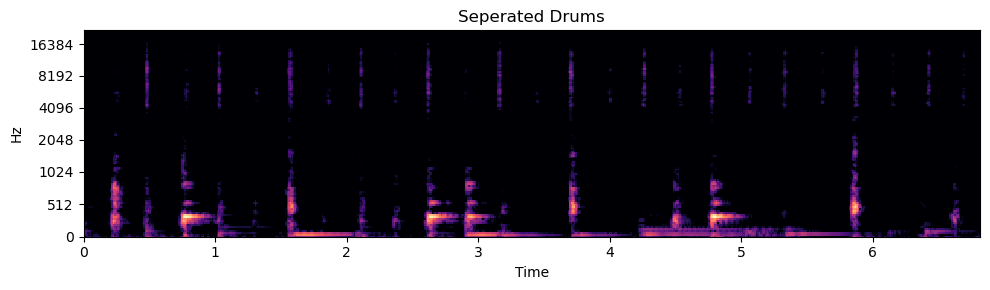

In [10]:
drum_est = mix.apply_mask(soft_mask)
drum_est.istft()
drum_est.embed_audio()

plt.figure(figsize=(10, 3))
plt.title('Seperated Drums')
nussl.utils.visualize_spectrogram(drum_est, y_axis='mel') 
plt.tight_layout()
plt.show()


## Binary mask

ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with clang version 4.0.1 (tags/RELEASE_401/final)
  configuration: --prefix=/opt/miniconda3/envs/tf --cc=x86_64-apple-darwin13.4.0-clang --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.100 / 56. 31.100
  libavcodec     58. 54.100 / 58. 54.100
  libavformat    58. 29.100 / 58. 29.100
  libavdevice    58.  8.100 / 58.  8.100
  libavfilter     7. 57.100 /  7. 57.100
  libavresample   4.  0.  0 /  4.  0.  0
  libswscale      5.  5.100 /  5.  5.100
  libswresample   3.  5.100 /  3.  5.100
  libpostproc    55.  5.100 / 55.  5.100
Guessed Channel Layout for Input Strea

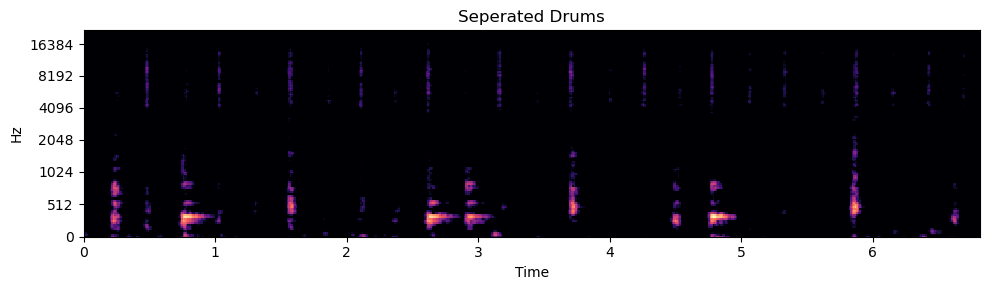

In [11]:
binary_mask = nussl.core.masks.BinaryMask(mask_data > 0.5)
drum_est = mix.apply_mask(binary_mask)
drum_est.istft()
drum_est.embed_audio()

plt.figure(figsize=(10, 3))
plt.title('Seperated Drums')
nussl.utils.visualize_spectrogram(drum_est, y_axis='mel')
plt.tight_layout()
plt.show()

ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with clang version 4.0.1 (tags/RELEASE_401/final)
  configuration: --prefix=/opt/miniconda3/envs/tf --cc=x86_64-apple-darwin13.4.0-clang --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.100 / 56. 31.100
  libavcodec     58. 54.100 / 58. 54.100
  libavformat    58. 29.100 / 58. 29.100
  libavdevice    58.  8.100 / 58.  8.100
  libavfilter     7. 57.100 /  7. 57.100
  libavresample   4.  0.  0 /  4.  0.  0
  libswscale      5.  5.100 /  5.  5.100
  libswresample   3.  5.100 /  3.  5.100
  libpostproc    55.  5.100 / 55.  5.100
Guessed Channel Layout for Input Strea

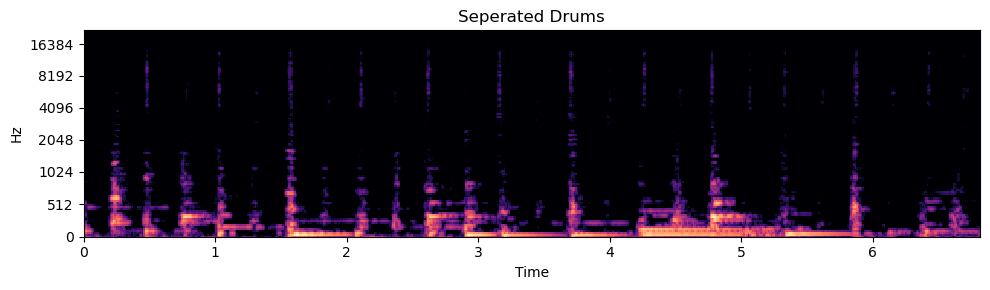

In [12]:
binary_mask = nussl.core.masks.BinaryMask(mask_data > 0.05)
drum_est = mix.apply_mask(binary_mask)
drum_est.istft()
drum_est.embed_audio()

plt.figure(figsize=(10, 3))
plt.title('Seperated Drums')
nussl.utils.visualize_spectrogram(drum_est, y_axis='mel')
plt.tight_layout()
plt.show()

# Finalising

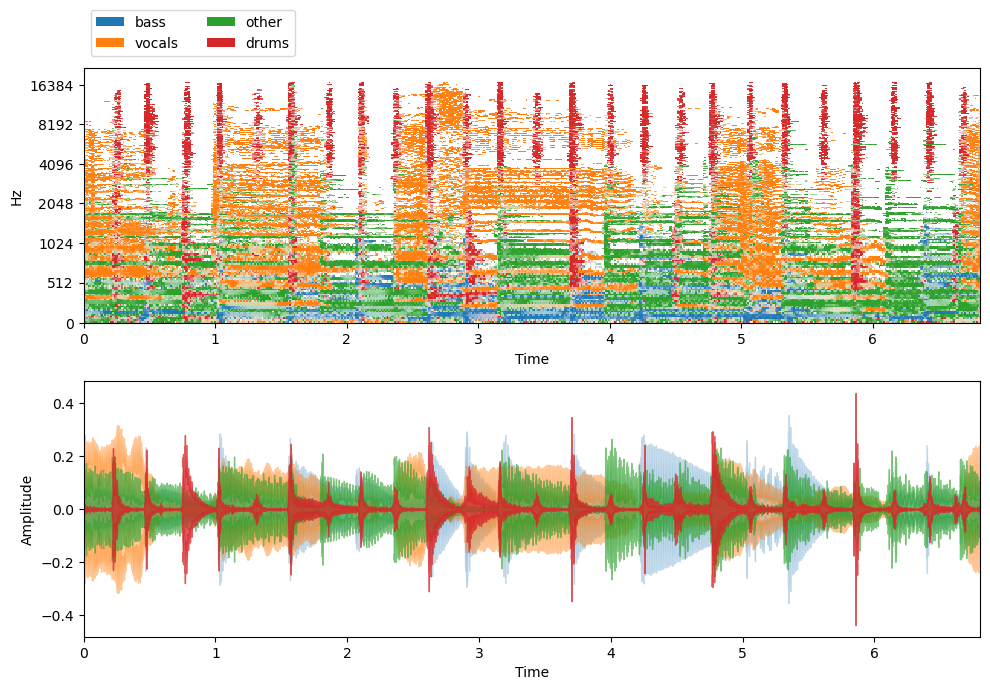


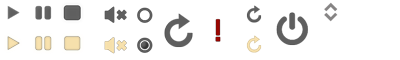
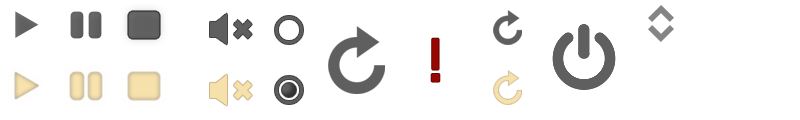
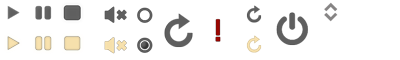

In [14]:
plt.figure(figsize=(10, 7))
plt.subplot(211)
nussl.utils.visualize_sources_as_masks(sources, db_cutoff=-60, y_axis='mel')

plt.subplot(212)
nussl.utils.visualize_sources_as_waveform(sources, show_legend=False)
plt.tight_layout()
plt.show()

nussl.play_utils.multitrack(sources, ext='.wav')

In [15]:
end_time = time.time()
time_taken = end_time - start_time
print(f"Time Taken: {time_taken:.4f} seconds")

Time Taken: 2130.9701 seconds
